<a href="https://colab.research.google.com/github/myeongseop2/NIDS_project/blob/main/BruteForce/bruteforce_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import io
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ids/02-14-2018.csv")

In [ ]:
 df.shape

(1048575, 80)

In [ ]:
df["Label"].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [ ]:
index = df["Label"].isin(['Benign','SSH-Bruteforce','FTP-BruteForce'])
cic_df = df[index]
cic_df.shape

(1048575, 80)

In [ ]:
df.isnull().sum().sum()

2277

In [ ]:
data = df.dropna()

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.shape

(1046298, 80)

In [ ]:
data["Label"].value_counts()

Benign            665355
FTP-BruteForce    193354
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [ ]:
data.duplicated().sum()

225628

In [ ]:
data.drop_duplicates(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data.shape

(820670, 80)

In [ ]:
data["Label"].value_counts()

Benign            664002
SSH-Bruteforce    117322
FTP-BruteForce     39346
Name: Label, dtype: int64

In [ ]:
df1 = data[data["Label"] == "Benign"][:156668]
df2 = data[data["Label"] == "SSH-Bruteforce"][:117322]
df3 = data[data["Label"] == "FTP-BruteForce"]

In [ ]:
df = pd.concat([df1, df2, df3], axis = 0)

In [ ]:
df['Label'].value_counts()

Benign            156668
SSH-Bruteforce    117322
FTP-BruteForce     39346
Name: Label, dtype: int64

In [ ]:
df[['Date', 'Time']] = df['Timestamp'].str.split(expand=True)

In [ ]:
df = df.drop('Timestamp', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Date,Time
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign,14/02/2018,08:31:01
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign,14/02/2018,08:33:50
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign,14/02/2018,08:36:39
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,0.0,0,0,0.0,0.000000,0,0,Benign,14/02/2018,08:40:13
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,0.0,0,0,0.0,0.000000,0,0,Benign,14/02/2018,08:40:23


In [ ]:
df['Time'] = df['Time'].str.replace(':', '')
df['Date'] = df['Date'].str.replace('/', '')

In [ ]:
df = df.astype({'Time' : 'int'})
df = df.astype({'Date' : 'int'})

In [ ]:
df.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Date,Time
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign,14022018,83101
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign,14022018,83350
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign,14022018,83639
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,0.0,0,0,0.0,0.000000,0,0,Benign,14022018,84013
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,0.0,0,0,0.0,0.000000,0,0,Benign,14022018,84023


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313336 entries, 0 to 383152
Data columns (total 81 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           313336 non-null  int64  
 1   Protocol           313336 non-null  int64  
 2   Flow Duration      313336 non-null  int64  
 3   Tot Fwd Pkts       313336 non-null  int64  
 4   Tot Bwd Pkts       313336 non-null  int64  
 5   TotLen Fwd Pkts    313336 non-null  int64  
 6   TotLen Bwd Pkts    313336 non-null  int64  
 7   Fwd Pkt Len Max    313336 non-null  int64  
 8   Fwd Pkt Len Min    313336 non-null  int64  
 9   Fwd Pkt Len Mean   313336 non-null  float64
 10  Fwd Pkt Len Std    313336 non-null  float64
 11  Bwd Pkt Len Max    313336 non-null  int64  
 12  Bwd Pkt Len Min    313336 non-null  int64  
 13  Bwd Pkt Len Mean   313336 non-null  float64
 14  Bwd Pkt Len Std    313336 non-null  float64
 15  Flow Byts/s        313336 non-null  float64
 16  Fl

In [ ]:
label_ = []

for at in df['Label']:
    if at == 'Benign':
        temp = 0
    else:
        temp = 1
    label_.append(temp)

In [ ]:
df["label"] = label_

In [ ]:
df.drop(['Label'], axis = 1, inplace = True)

In [ ]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Date,Time,label
0,0,0,112641719,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320859.5,139.300036,56320958,56320761,14022018,83101,0
1,0,0,112641466,3,0,0,0,0,0,0.000000,...,0.0,0,0,56320733.0,114.551299,56320814,56320652,14022018,83350,0
2,0,0,112638623,3,0,0,0,0,0,0.000000,...,0.0,0,0,56319311.5,301.934596,56319525,56319098,14022018,83639,0
3,22,6,6453966,15,10,1239,2273,744,0,82.600000,...,0.0,0,0,0.0,0.000000,0,0,14022018,84013,0
4,22,6,8804066,14,11,1143,2209,744,0,81.642857,...,0.0,0,0,0.0,0.000000,0,0,14022018,84023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383114,21,6,27,1,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.000000,0,0,14022018,120636,1
383121,21,6,4,1,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.000000,0,0,14022018,120812,1
383128,21,6,3,1,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.000000,0,0,14022018,120816,1
383144,21,6,20,1,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.000000,0,0,14022018,120634,1


In [ ]:
import numpy as np

#columns_to_drop = ['Flow Byts/s', 'Flow Pkts/s']
max_flow_bytes = df.loc[df['Flow Byts/s'] != np.inf, 'Flow Byts/s'].max()
max_flow_pkts = df.loc[df['Flow Pkts/s'] != np.inf, 'Flow Pkts/s'].max()

print(max_flow_bytes, max_flow_pkts)

422631578.947368 3000000.0


In [ ]:
#df.drop(columns=columns_to_drop, inplace = True)

df['Flow Byts/s'].replace(np.inf, max_flow_bytes + 1, inplace = True)
df['Flow Pkts/s'].replace(np.inf, max_flow_pkts + 1, inplace = True)

In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)

In [ ]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Date,Time,label
444522,53,17,295,1,1,41,57,41,41,41.000000,...,0.0,0,0,0.0,0.0,0,0,14022018,110729,0
464780,53,17,412,1,1,36,164,36,36,36.000000,...,0.0,0,0,0.0,0.0,0,0,14022018,125905,0
205035,22,6,376089,22,20,1928,2665,640,0,87.636364,...,0.0,0,0,0.0,0.0,0,0,14022018,22054,1
295800,22,6,394949,22,22,1912,2665,640,0,86.909091,...,0.0,0,0,0.0,0.0,0,0,14022018,30435,1
385160,445,6,713571,7,5,364,582,103,0,52.000000,...,0.0,0,0,0.0,0.0,0,0,14022018,112552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209161,22,6,13,1,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.0,0,0,14022018,20920,1
217368,22,6,391392,22,20,1944,2665,640,0,88.363636,...,0.0,0,0,0.0,0.0,0,0,14022018,22651,1
453939,80,6,5780562,4,4,97,232,97,0,24.250000,...,0.0,0,0,0.0,0.0,0,0,14022018,94104,0
364030,21,6,19,1,1,0,0,0,0,0.000000,...,0.0,0,0,0.0,0.0,0,0,14022018,120829,1


In [ ]:
#삭제할 특징
del_col = ['Flow Duration',
 'Flow IAT Mean',
 'ACK Flag Cnt',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Pkt Len Min',
 'Bwd Pkt Len Min',
 'Bwd Pkts/b Avg',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Idle Mean',
 'ECE Flag Cnt',
 'Bwd Byts/b Avg',
 'Bwd Blk Rate Avg',
 'URG Flag Cnt',
 'Fwd PSH Flags',
 'Bwd Pkt Len Mean',
 'Idle Min',
 'Fwd Pkt Len Min',
 'Tot Bwd Pkts',
 'Down/Up Ratio',
 'Flow IAT Std',
 'Bwd IAT Tot',
 'Bwd Seg Size Avg',
 'Date',
 'Flow IAT Min',
 'Pkt Len Max',
 'Active Mean',
 'Fwd Byts/b Avg',
 'Flow IAT Max',
 'Fwd IAT Max',
 'Pkt Size Avg',
 'Fwd Blk Rate Avg',
 'Flow Byts/s',
 'RST Flag Cnt',
 'Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Idle Std',
 'Fwd IAT Min',
 'Active Max',
 'Bwd IAT Min',
 'Fwd IAT Tot',
 'Bwd URG Flags',
 'Fwd IAT Mean',
 'FIN Flag Cnt',
 'Fwd IAT Std',
 'Active Min',
 'Fwd Pkt Len Mean',
 'SYN Flag Cnt',
 'Pkt Len Var',
 'Bwd Pkt Len Max',
 'CWE Flag Count',
 'PSH Flag Cnt',
 'Pkt Len Std',
 'Fwd Pkts/b Avg',
 'Idle Max',
 'Bwd IAT Max',
 'Protocol',
 'Active Std']

In [ ]:
df = df.drop(del_col, axis=1)

In [ ]:
df

,Dst Port,Tot Fwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Std,Flow Pkts/s,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,...,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Time,label
444522,53,1,41,57,41,0.000000,6779.661017,8,8,3389.830508,...,1,41,1,57,-1,-1,0,8,110729,0
464780,53,1,36,164,36,0.000000,4854.368932,8,8,2427.184466,...,1,36,1,164,-1,-1,0,8,125905,0
205035,22,22,1928,2665,640,137.780552,111.675694,712,648,58.496792,...,22,1928,20,2665,26883,230,16,32,22054,1
295800,22,22,1912,2665,640,137.688022,111.406789,712,712,55.703395,...,22,1912,22,2665,26883,230,16,32,30435,1
385160,445,7,364,582,103,49.217206,16.816827,152,112,9.809816,...,7,364,5,582,8192,257,4,20,112552,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209161,22,1,0,0,0,0.000000,153846.153846,32,32,76923.076923,...,1,0,1,0,241,230,0,32,20920,1
217368,22,22,1944,2665,640,137.869001,107.309296,712,648,56.209631,...,22,1944,20,2665,26883,230,16,32,22651,1
453939,80,4,97,232,97,48.500000,1.383948,92,92,0.691974,...,4,97,4,232,8192,141,1,20,94104,0
364030,21,1,0,0,0,0.000000,105263.157895,40,20,52631.578947,...,1,0,1,0,26883,0,0,40,120829,1


In [ ]:
#중간 저장
df.to_csv("cic_.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ids/cic_.csv")

In [ ]:
df

,Dst Port,Tot Fwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Std,Flow Pkts/s,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,...,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Time,label
0,22,22,1960,2665,640,137.953377,111.696389,712,712,55.848194,...,22,1960,22,2665,26883,230,16,32,23756,1
1,21,1,0,0,0,0.000000,1000000.000000,40,20,500000.000000,...,1,0,1,0,26883,0,0,40,104634,1
2,22,22,1976,2665,640,138.033687,128.017131,712,712,64.008566,...,22,1976,22,2665,26883,230,16,32,22317,1
3,445,3,0,0,0,0.000000,13.634985,72,32,10.226238,...,3,0,1,0,8192,8192,0,20,10807,0
4,22,19,1912,2665,640,143.735950,357.307816,616,712,165.581671,...,19,1912,22,2665,26883,230,16,32,30319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203663,22,22,1928,2665,640,137.780552,121.184412,712,712,60.592206,...,22,1928,22,2665,26883,230,16,32,32729,1
203664,443,20,1026,3111,660,152.007306,0.320596,412,344,0.173295,...,20,1026,17,3111,8192,31020,15,20,103242,0
203665,22,22,1912,2665,640,137.688022,125.721470,712,712,62.860735,...,22,1912,22,2665,26883,230,16,32,25758,1
203666,21,1,0,0,0,0.000000,666666.666667,40,20,333333.333333,...,1,0,1,0,26883,0,0,40,111716,1


In [ ]:
indx = ['Fwd Seg Size Min',
'Dst Port',
'Time',
'Fwd Header Len',
'Fwd Act Data Pkts',
'Bwd Header Len',
'Subflow Fwd Byts',
'TotLen Fwd Pkts',
'Tot Fwd Pkts',
'Subflow Fwd Pkts',
'Subflow Bwd Pkts',
'TotLen Bwd Pkts',
'Init Bwd Win Byts',
'Subflow Bwd Byts',
'Fwd Seg Size Avg',
'Init Fwd Win Byts',
'Bwd Pkts/s',
'Fwd Pkt Len Max',
'Fwd Pkt Len Std',
'Flow Pkts/s',
'Fwd Pkts/s']


In [ ]:
data, target = df.drop(columns = ['label']), df['label']

In [ ]:
print(data.shape, target.shape)

(313336, 21) (313336,)


In [ ]:
#사용할 특징 # 현재 데이터셋에 들어있는 특징들!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
num_col = ['Fwd Seg Size Min',
'Dst Port',
'Time',
'Fwd Header Len',
'Fwd Act Data Pkts',
'Bwd Header Len',
'Subflow Fwd Byts',
'TotLen Fwd Pkts',
'Tot Fwd Pkts',
'Subflow Fwd Pkts',
'Subflow Bwd Pkts',
'TotLen Bwd Pkts',
'Init Bwd Win Byts',
'Subflow Bwd Byts',
'Fwd Seg Size Avg',
'Init Fwd Win Byts',
'Bwd Pkts/s',
'Fwd Pkt Len Max',
'Fwd Pkt Len Std',
'Flow Pkts/s',
'Fwd Pkts/s']

In [ ]:
#삭제할 특징
num_col = ['Flow Duration',
 'Flow IAT Mean',
 'ACK Flag Cnt',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Pkt Len Min',
 'Bwd Pkt Len Min',
 'Bwd Pkts/b Avg',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Idle Mean',
 'ECE Flag Cnt',
 'Bwd Byts/b Avg',
 'Bwd Blk Rate Avg',
 'URG Flag Cnt',
 'Fwd PSH Flags',
 'Bwd Pkt Len Mean',
 'Idle Min',
 'Fwd Pkt Len Min',
 'Tot Bwd Pkts',
 'Down/Up Ratio',
 'Flow IAT Std',
 'Bwd IAT Tot',
 'Bwd Seg Size Avg',
 'Date',
 'Flow IAT Min',
 'Pkt Len Max',
 'Active Mean',
 'Fwd Byts/b Avg',
 'Flow IAT Max',
 'Fwd IAT Max',
 'Pkt Size Avg',
 'Fwd Blk Rate Avg',
 'Flow Byts/s',
 'RST Flag Cnt',
 'Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Idle Std',
 'Fwd IAT Min',
 'Active Max',
 'Bwd IAT Min',
 'Fwd IAT Tot',
 'Bwd URG Flags',
 'Fwd IAT Mean',
 'FIN Flag Cnt',
 'Fwd IAT Std',
 'Active Min',
 'Fwd Pkt Len Mean',
 'SYN Flag Cnt',
 'Pkt Len Var',
 'Bwd Pkt Len Max',
 'CWE Flag Count',
 'PSH Flag Cnt',
 'Pkt Len Std',
 'Fwd Pkts/b Avg',
 'Idle Max',
 'Bwd IAT Max',
 'Protocol',
 'Active Std']

In [ ]:
num_col = list(set(data.columns))

In [ ]:
num_col

['Tot Fwd Pkts',
 'Flow Duration',
 'Flow IAT Mean',
 'Fwd Pkt Len Std',
 'ACK Flag Cnt',
 'Subflow Fwd Byts',
 'Time',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Pkt Len Min',
 'Bwd Pkt Len Min',
 'Bwd Pkts/b Avg',
 'Bwd PSH Flags',
 'Fwd Pkts/s',
 'Fwd URG Flags',
 'Idle Mean',
 'TotLen Fwd Pkts',
 'ECE Flag Cnt',
 'Fwd Act Data Pkts',
 'Bwd Byts/b Avg',
 'Bwd Header Len',
 'Bwd Blk Rate Avg',
 'URG Flag Cnt',
 'Fwd PSH Flags',
 'Bwd Pkt Len Mean',
 'Bwd Pkts/s',
 'Idle Min',
 'Dst Port',
 'Fwd Pkt Len Min',
 'Fwd Header Len',
 'Tot Bwd Pkts',
 'Down/Up Ratio',
 'Flow IAT Std',
 'Bwd IAT Tot',
 'Bwd Seg Size Avg',
 'TotLen Bwd Pkts',
 'Date',
 'Subflow Bwd Pkts',
 'Flow Pkts/s',
 'Subflow Bwd Byts',
 'Fwd Seg Size Min',
 'Flow IAT Min',
 'Pkt Len Max',
 'Active Mean',
 'Fwd Byts/b Avg',
 'Flow IAT Max',
 'Fwd IAT Max',
 'Pkt Size Avg',
 'Fwd Blk Rate Avg',
 'Flow Byts/s',
 'RST Flag Cnt',
 'Pkt Len Mean',
 'Bwd Pkt Len Std',
 'Idle Std',
 'Fwd IAT Min',
 'Active Max',
 'Bwd IAT Min',
 'Fwd I

In [ ]:
len(num_col)

21

In [ ]:
for i in num_col:
    for j in indx:
        if i == j:
            num_col.remove(i)

In [ ]:
len(num_col)

21

In [ ]:
target.head

<bound method NDFrame.head of 0         1
1         1
2         1
3         0
4         1
         ..
203663    1
203664    0
203665    1
203666    1
203667    1
Name: label, Length: 203668, dtype: int64>

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(data[num_col])

In [ ]:
data[num_col] = scaler.transform(data[num_col])

In [ ]:
data.head()

,Dst Port,Tot Fwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Std,Flow Pkts/s,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,...,Fwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Time
444522,-0.289619,-0.256886,-0.028931,-0.029641,-0.687767,-0.787025,-0.315138,-0.319170,-0.155247,-0.284987,...,-0.155348,-0.256886,-0.028931,-0.103977,-0.029641,-1.031508,-0.293895,-0.738157,-1.651194,1.044137
464780,-0.289619,-0.256886,-0.029105,-0.028814,-0.701895,-0.787025,-0.320454,-0.319170,-0.155247,-0.289454,...,-0.240204,-0.256886,-0.029105,-0.103977,-0.028814,-1.031508,-0.293895,-0.738157,-1.651194,1.406393
205035,-0.292054,0.353294,0.036706,-0.009472,1.004714,0.743226,-0.333547,0.491833,0.196842,-0.300446,...,0.636132,0.353294,0.036706,0.107171,-0.009472,0.927345,-0.279457,1.278142,0.677626,-1.072565
295800,-0.292054,0.353294,0.036150,-0.009472,1.004714,0.742199,-0.333548,0.491833,0.232051,-0.300459,...,0.623789,0.353294,0.036150,0.129398,-0.009472,0.927345,-0.279457,1.278142,0.677626,-0.872508
385160,-0.258825,-0.082549,-0.017696,-0.025581,-0.512585,-0.240397,-0.333809,-0.153283,-0.098032,-0.300672,...,0.031337,-0.082549,-0.017696,-0.059524,-0.025581,-0.434540,-0.277770,-0.234082,-0.486784,1.087652


In [ ]:
data = data.astype(float)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense

n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=3)
accuracy = []
# k개로 쪼갠 데이터를 for문으로 k번 검증함
for train, test in skf.split(data, target):
    model = Sequential()
    model.add(Dense(24, input_dim=21, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                 optimizer='adam',
                 metrics=['accuracy'])
    model.fit(data[train], target[train], epochs=100, batch_size=5)
    k_accuracy = '%.4f' % (model.evaluate(data[test], target[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print('\n %.f fold accuracy:' % n_fold, accuracy)

KeyError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, stratify = target, random_state = 22)

In [ ]:
x_train.shape

(219335, 21)

In [ ]:
#중간 저장
x_train.to_csv("x_train_1.csv", index=False)
y_train.to_csv("y_train_1.csv", index=False)
x_test.to_csv("x_test_1.csv", index=False)
y_test.to_csv("y_test_1.csv", index=False)

In [ ]:
import pandas as pd

x_train = pd.read_csv("/content/drive/MyDrive/ids/x_train.csv")
y_train = pd.read_csv("/content/drive/MyDrive/ids/y_train.csv")
x_test = pd.read_csv("/content/drive/MyDrive/ids/x_test.csv")
y_test = pd.read_csv("/content/drive/MyDrive/ids/y_test.csv")

In [ ]:
n_est = []
max_d = []
min_leaf = []
min_split = []

for i in range(1000, 2001, 500):
    n_est.append(i)
for i in range(2,8, 2):
    max_d.append(i)
    min_leaf.append(i)
    min_split.append(i)

In [ ]:
print(n_est)
print(max_d)
print(min_leaf)
print(min_split)

[1000, 1500, 2000]
[2, 4, 6]
[2, 4, 6]
[2, 4, 6]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = { 'n_estimators' : [100, 200, 500, 1000],
           'max_depth' : [1, 2, 3],
           'min_samples_leaf' : [1, 2, 3],
           'min_samples_split' : [2, 3]
            } 

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9999


In [ ]:
#랜덤 포레스트의 특성 중요도
from sklearn.ensemble import RandomForestClassifier
import numpy as np

feat_labels = x_train.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)

forest.fit(x_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(x_train.shape[1]-1):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# plt.title("Feature importance")
# plt.bar(range(X_train.shape[1]), importances[indices], align = 'center')

# plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation = 90)
# plt.xlin([-1, X_train.shape[1]])
# plt.tight_layout()
# plt.show()

 1) Active Mean                    0.146745
 2) Protocol                       0.138562


IndexError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators = 10)
rfc.fit(x_train, y_train)
prediction = rfc.predict(x_test)
print("Accuracy is : ", accuracy_score(prediction, y_test))
print("===================================================")
print(classification_report(prediction, y_test))

Accuracy is :  0.9999857942438276
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35198
           1       1.00      1.00      1.00     35196

    accuracy                           1.00     70394
   macro avg       1.00      1.00      1.00     70394
weighted avg       1.00      1.00      1.00     70394



In [ ]:
clf_2 = RandomForestClassifier(n_estimators = 200, oob_score = True)
clf_2.fit(x_train, y_train)
prediction_2 = clf_2.predict(x_test)
print("Accuracy is : ", accuracy_score(prediction_2, y_test))
print("===================================================")
print(classification_report(prediction_2, y_test))

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy is :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35197
           1       1.00      1.00      1.00     35197

    accuracy                           1.00     70394
   macro avg       1.00      1.00      1.00     70394
weighted avg       1.00      1.00      1.00     70394



In [ ]:
for feature, imp in zip(feat_label, clf_2.feature_importances_):
    print(feature, imp)

NameError: ignored

In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics

xgb = XGBClassifier(random_state = 0, n_estimators = 300).fit(x_train, y_train)

print("train accuracy : ", metrics.accuracy_score(y_train, xgb.predict(x_train)))
print("test accuracy : ", metrics.accuracy_score(y_test, xgb.predict(x_test)))

train accuracy :  1.0
test accuracy :  1.0


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb, random_state = 1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.2470 ± 0.0014,Fwd Seg Size Min
0.2464 ± 0.0011,Dst Port
0.0001 ± 0.0000,Flow Duration
0.0000 ± 0.0000,Init Bwd Win Byts
0.0000 ± 0.0000,Time
0 ± 0.0000,Idle Mean
0 ± 0.0000,Fwd IAT Tot
0 ± 0.0000,Fwd IAT Mean
0 ± 0.0000,Fwd IAT Std
0 ± 0.0000,Fwd IAT Max


In [ ]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(silent=True, random_state=0, n_estimators=300).fit(x_train, y_train)
print("train set accuracy : ", metrics.accuracy_score(y_train, cb.predict(x_train)))
print("test set accuracy : ", metrics.accuracy_score(y_test, cb.predict(x_test)))

train set accuracy :  0.9999878234398782
test set accuracy :  0.9999715884876552


In [ ]:
perm = PermutationImportance(cb, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
 
def clf(x, y, col_list):
# random forest
    rfc = RandomForestClassifier(max_depth=12, random_state=99, criterion = "entropy",n_estimators = 3, max_features='auto')
    rfc.fit(x, y)
    result_rfc = permutation_importance(rfc, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_rfc = result_rfc.importances_mean.argsort()
    importances_rf = pd.DataFrame(result_rfc.importances_mean[sorted_idx_rfc], index=x.columns[sorted_idx_rfc]).sort_values(0, ascending=False).iloc[:45]
    
 # gradient boosting
    gb = GradientBoostingClassifier(criterion='friedman_mse',loss='deviance', max_depth=5, n_estimators=30, random_state=99, max_features='auto')
    gb.fit(x, y)
    result_gb = permutation_importance(gb, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_gb = result_gb.importances_mean.argsort()
    importances_gb = pd.DataFrame(result_gb.importances_mean[sorted_idx_gb], index=x.columns[sorted_idx_gb]).sort_values(0, ascending=False).iloc[:45]
    
 # xg boosting
    xg = XGBClassifier(booster='gbtree', max_depth=7,  gamma=0.5, learning_rate=0.01, n_estimators=3, random_state=99)
    xg.fit(x, y)
    result_xg = permutation_importance(xg, x,y , n_repeats=10, random_state=333, n_jobs=2)
    sorted_idx_xg = result_xg.importances_mean.argsort()
    importances_xg = pd.DataFrame(result_xg.importances_mean[sorted_idx_xg], index=x.columns[sorted_idx_xg]).sort_values(0, ascending=False).iloc[:45]
 
    return importances_rf, importances_gb,importances_xg


In [ ]:
rfc_list, gb_list, xg_list=clf(x_train, y_train, x_train.index)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
rfc_list

,0
Subflow Bwd Byts,2.109619e-01
Dst Port,4.979543e-02
Time,3.755921e-02
Init Bwd Win Byts,2.544292e-02
Bwd IAT Max,6.094368e-04
Fwd Seg Size Min,4.919330e-04
ACK Flag Cnt,3.044140e-05
Flow Pkts/s,1.278539e-05
Pkt Len Var,1.035008e-05
Fwd Pkt Len Std,6.088280e-06


In [ ]:
gb_list

,0
Fwd Seg Size Min,0.246614
Dst Port,0.246244
Init Fwd Win Byts,0.091865
TotLen Bwd Pkts,0.000000
Flow IAT Std,0.000000
Fwd Pkt Len Min,0.000000
Protocol,0.000000
Flow Duration,0.000000
Tot Fwd Pkts,0.000000
Tot Bwd Pkts,0.000000


In [ ]:
xg_list

,0
Fwd Seg Size Min,0.247514
Dst Port,0.246606
Flow Duration,0.095358
Fwd Pkt Len Max,0.000000
Bwd Pkts/s,0.000000
Flow IAT Mean,0.000000
Protocol,0.000000
Tot Fwd Pkts,0.000000
Tot Bwd Pkts,0.000000
TotLen Fwd Pkts,0.000000


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="NanumGothic",
        rc={"axes.unicode_minus":False},
        style='whitegrid')
result = permutation_importance(rfc, x, y, n_repeats=10,
                                random_state=99, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
 
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()


NameError: ignored

In [ ]:
def plot_feature_importances_cancer(model):
    



    n_features = data.shape[1]

    plt.figure(figsize=(6,15))

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), x_train.columns)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

    
plt.show()

In [ ]:
def plt_feature(model):
    # 배열형태로 반환
    ft_importance_values = model.feature_importances_

    # 정렬과 시각화를 쉽게 하기 위해 series 전환
    ft_series = pd.Series(ft_importance_values, index = x_train.columns)
    ft = ft_series.sort_values(ascending=False)

    plt.figure(figsize=(6,15))
    plt.title("feature importance")
    sns.barplot(x=ft, y=ft.index)

    plt.show()

In [ ]:

x_tr, x_te, y_tr, y_te = train_test_split(data, target, random_state=0)



forest_1 = RandomForestClassifier(n_estimators=100,random_state=0)

forest_1.fit(x_tr,y_tr)



print("훈련 세트 정확도 : {:.3f}".format(forest_1.score(x_tr,y_tr)))

print("테스트 세트 정확도 : {:.3f}".format(forest_1.score(x_te,y_te)))



# 특성 중요도

print("특성 중요도 : \n{}".format(forest_1.feature_importances_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 1.000
특성 중요도 : 
[1.35350938e-01 5.07587469e-04 4.88952394e-03 6.15562699e-02
 2.02439965e-02 4.73878569e-02 1.78824511e-02 1.29126949e-02
 2.95270162e-06 8.36317062e-03 3.33605694e-03 4.32278788e-04
 0.00000000e+00 8.07786311e-04 3.41548838e-03 2.32258948e-03
 3.86335596e-02 7.98175001e-03 4.42212105e-03 2.22808138e-03
 2.77994705e-05 1.84139886e-03 1.88798440e-03 6.35983702e-04
 4.56274678e-03 4.86842863e-05 3.41497946e-03 3.90264360e-06
 1.08275802e-04 1.69589579e-03 3.00669433e-03 1.80928839e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.86810982e-02
 5.04050101e-02 2.28033627e-02 4.75746934e-02 0.00000000e+00
 3.91412772e-03 5.22870137e-03 5.28334135e-03 2.12087232e-03
 1.39630417e-05 1.22412458e-05 0.00000000e+00 1.74905514e-04
 3.76916605e-03 1.60891390e-02 0.00000000e+00 2.06043564e-07
 1.60504835e-04 2.98503103e-03 2.08764933e-02 3.57369204e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.31486

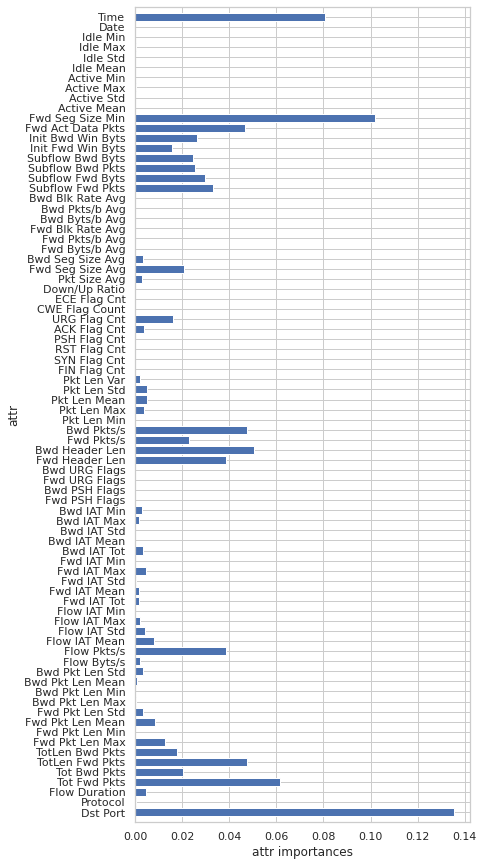

In [ ]:
import matplotlib.pyplot as plt
plot_feature_importances_cancer(forest_1)

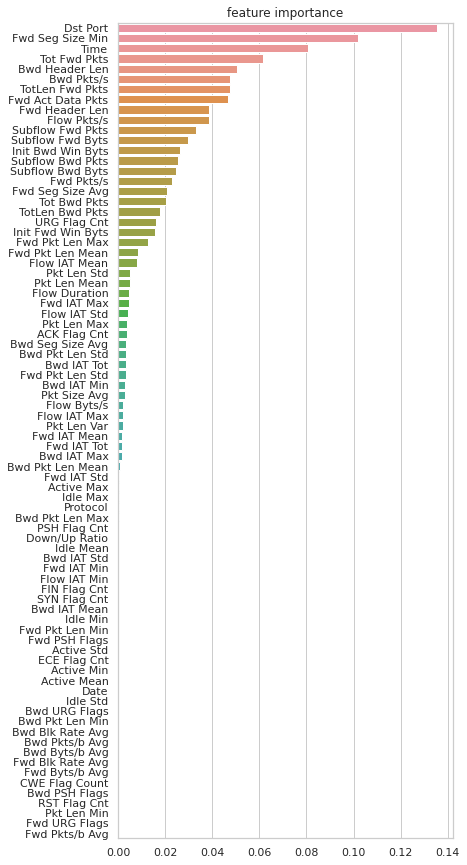

In [ ]:
plt_feature(forest_1)

In [ ]:
forest_2 = RandomForestClassifier(n_estimators=100,random_state=0)

forest_2.fit(x_train,y_train)



print("훈련 세트 정확도 : {:.3f}".format(forest_2.score(x_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest_2.score(x_test,y_test)))



# 특성 중요도

print("특성 중요도 : \n{}".format(forest_2.feature_importances_))









훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 1.000
특성 중요도 : 
[1.37003624e-01 5.07965839e-04 1.88438242e-03 6.52335536e-02
 2.58532618e-02 4.69520720e-02 1.31150241e-02 8.36692760e-03
 7.91799195e-06 8.36174309e-03 4.49086621e-03 3.57669047e-03
 0.00000000e+00 1.22672980e-03 7.70618900e-03 2.88164617e-03
 4.18163452e-02 1.98754092e-03 2.11695805e-03 4.64694007e-03
 4.89667960e-05 6.25266242e-04 1.31483608e-03 3.16026594e-03
 4.78515049e-03 3.44906594e-06 3.09839785e-03 1.01530655e-03
 5.32673686e-04 3.15132063e-04 2.68623480e-03 2.26137906e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.54997813e-02
 5.07667647e-02 2.28256313e-02 3.32759685e-02 0.00000000e+00
 4.66098102e-03 4.99799704e-03 7.58488170e-03 2.15257096e-03
 4.00775357e-06 0.00000000e+00 0.00000000e+00 1.06038164e-04
 2.68407999e-03 1.56166191e-02 0.00000000e+00 6.66097091e-10
 5.84262442e-04 7.30213567e-03 1.70825461e-02 2.15050729e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.32289

In [ ]:
forest_22

RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

forest_22 = RandomForestClassifier(n_estimators=1000,random_state=0, max_depth=1, max_features='auto')

forest_22.fit(x_train,y_train)

print("특성 중요도 : \n{}".format(forest_22.feature_importances_))

특성 중요도 : 
[0.088 0.    0.001 0.048 0.036 0.05  0.032 0.015 0.    0.006 0.015 0.007
 0.    0.001 0.007 0.001 0.015 0.006 0.    0.001 0.    0.003 0.002 0.
 0.001 0.    0.001 0.    0.    0.002 0.002 0.    0.    0.    0.    0.078
 0.061 0.012 0.018 0.    0.004 0.004 0.002 0.002 0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.021 0.    0.    0.    0.    0.
 0.    0.    0.036 0.061 0.035 0.023 0.019 0.027 0.072 0.107 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.078]


In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest_22.score(x_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest_22.score(x_test,y_test)))

훈련 세트 정확도 : 0.895
테스트 세트 정확도 : 0.895


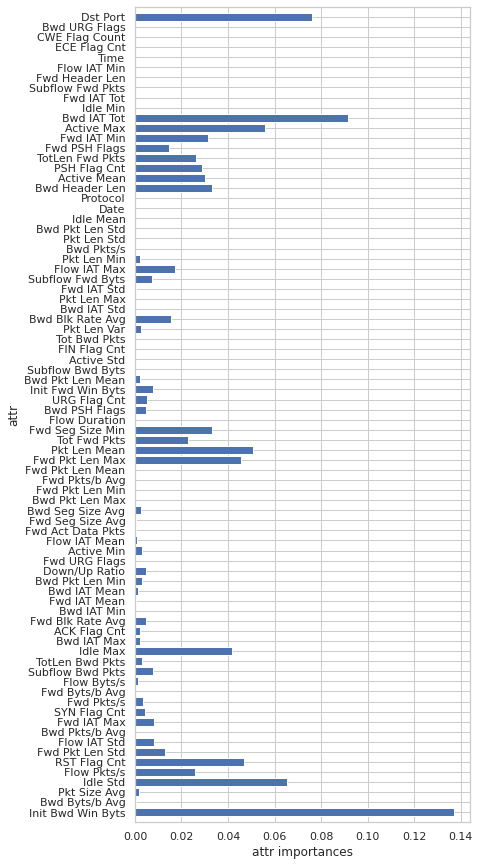

In [ ]:
plot_feature_importances_cancer(forest_2)

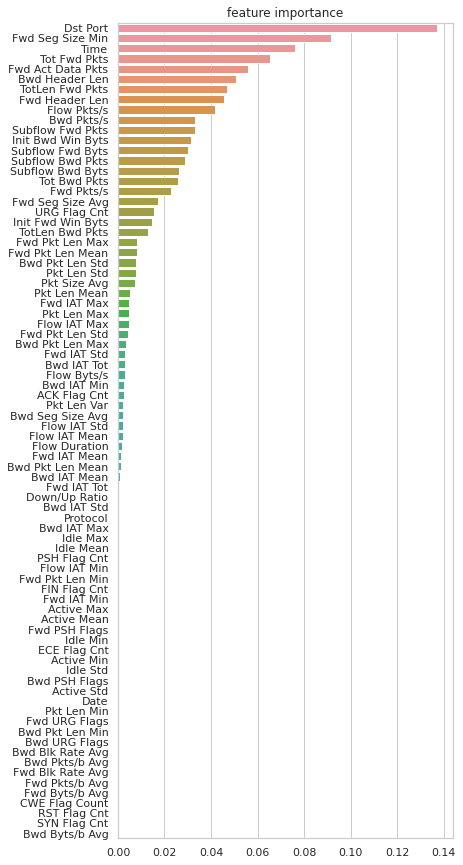

In [ ]:
plt_feature(forest_2)

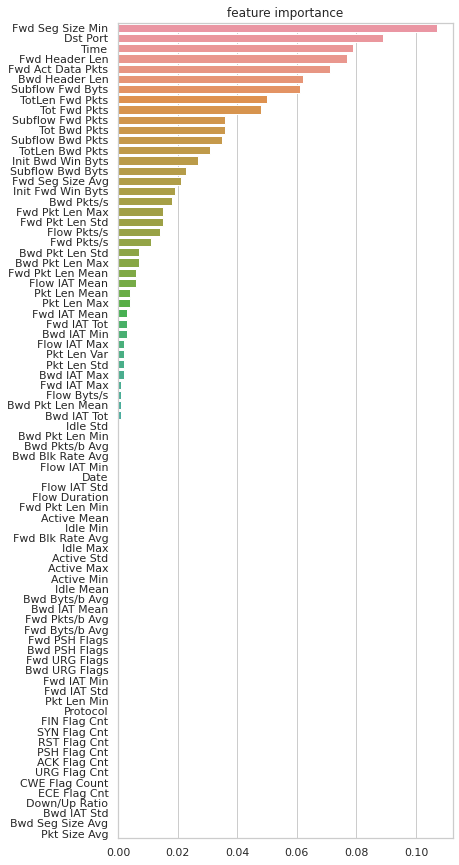

In [ ]:
#가지 1000개
plt_feature(forest_22)

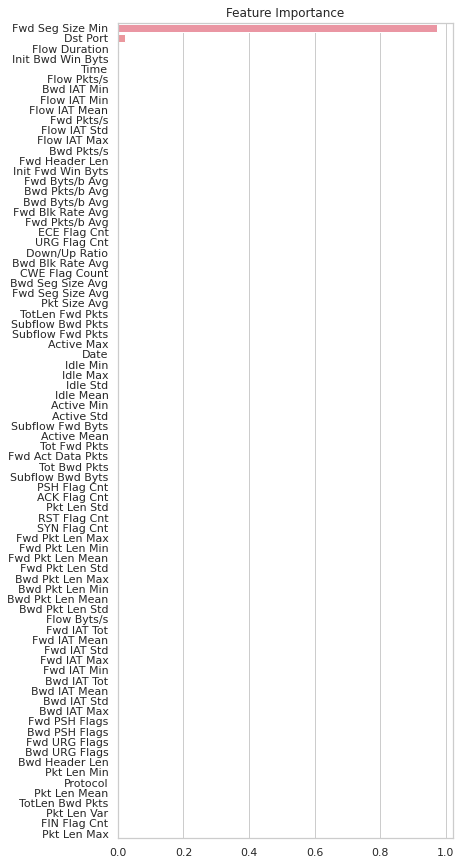

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=11)
xgb.fit(x_train, y_train)

# 배열형태로 반환
ft_importance_values = xgb.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft = ft_series.sort_values(ascending=False)

plt.figure(figsize=(6,15))
plt.title('Feature Importance')
sns.barplot(x=ft, y=ft.index)
plt.show()

In [ ]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier().fit(x_train, y_train)

perm = PermutationImportance(rf, scoring = "accuracy", random_state = 22).fit(x_test, y_test) 
eli5.show_weights(perm, top = 20, feature_names = x_test.columns.tolist())

Weight,Feature
0.0248 ± 0.0006,Dst Port
0.0000 ± 0.0000,Fwd Seg Size Min
0.0000 ± 0.0000,Time
0 ± 0.0000,Idle Max
0 ± 0.0000,Fwd IAT Mean
0 ± 0.0000,Fwd IAT Std
0 ± 0.0000,Fwd IAT Max
0 ± 0.0000,Fwd IAT Min
0 ± 0.0000,Bwd IAT Tot
0 ± 0.0000,Bwd IAT Mean


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, n_estimators=1000)
gbrt.fit(x_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(x_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000


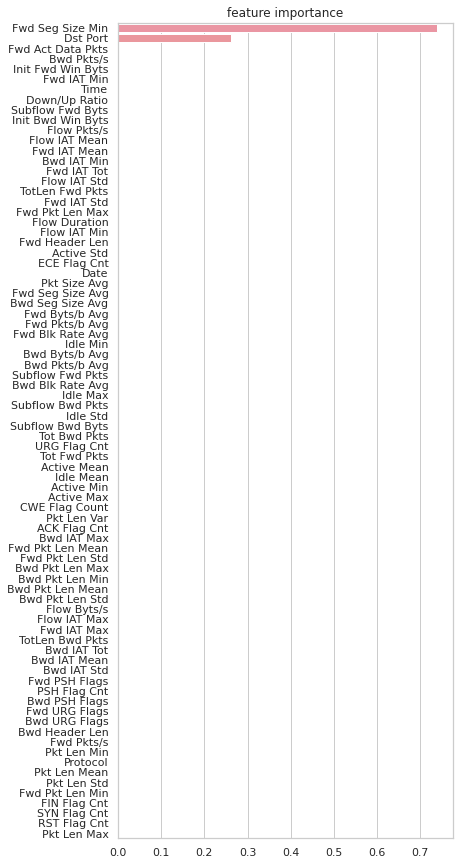

In [ ]:
plt_feature(gbrt)

In [ ]:
(criterion='friedman_mse',loss='deviance', max_depth=5, n_estimators=30, random_state=99, max_features='auto')

In [ ]:
#DNN
import tensorflow as tf
tf.config.list_physical_devices('GPU')
from keras.layers import Dropout

dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Flatten()) 
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

dnn.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

dnn.fit(x_train, y_train, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
143/143 [==============================] - 6s 32ms/step - loss: 0.0931 - accuracy: 0.9523
Epoch 2/100
143/143 [==============================] - 4s 31ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 3/100
143/143 [==============================] - 5s 32ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 4/100
143/143 [==============================] - 4s 31ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 5/100
143/143 [==============================] - 5s 38ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 6/100
143/143 [==============================] - 6s 44ms/step - loss: 9.0826e-04 - accuracy: 0.9999
Epoch 7/100
143/143 [==============================] - 6s 40ms/step - loss: 8.9732e-04 - accuracy: 0.9998
Epoch 8/100
143/143 [==============================] - 7s 48ms/step - loss: 9.0054e-04 - accuracy: 0.9998
Epoch 9/100
143/143 [==============================] - 7s 47ms/step - loss: 6.8067e-04 - accuracy: 0.9999
Epoch 10/100
143/143 [==============================] - 7s 46ms/st

In [ ]:
#SVC
from sklearn.svm import SVC
from sklearn import svm, metrics

_svm = svm.SVC(kernel='linear', C=100, probability=False, verbose = True)
_svm.fit(X=x_train, y=y_train)
model = _svc

predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

NameError: ignored

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=21)

pca.fit(x_train)
x_train_pca=pca.transform(x_train)

#newcode pca test
pca.fit(x_test)
x_test_pca=pca.transform(x_test) 

traindata = np.array(x_train_pca)
trainlabel = np.array(y_train)

testdata = np.array(x_test_pca)
testlabel = np.array(y_test)

In [ ]:
print(traindata.shape)
print(testdata.shape)

(142567, 1, 21)
(61101, 21)


In [ ]:
traindata = np.reshape(traindata, (142567, 1, 21))
testdata = np.reshape(testdata, (61101, 1, 21))

In [ ]:
print(traindata.shape)
print(testdata.shape)

(142567, 1, 21)
(61101, 1, 21)


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM
import numpy as np

model = Sequential()

# IF you are running with a GPU, try out the CuDNNLSTM layer type instead (don't pass an activation, tanh is required)
model.add(CuDNNLSTM(128, input_shape=(1,21), return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'],
)

model.fit(traindata,trainlabel,epochs=3,validation_data=(testdata, testlabel))

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


InvalidArgumentError: ignored

In [ ]:
print(x_train.shape)

(142567, 21)


In [ ]:
#DNN
import tensorflow as tf
tf.config.list_physical_devices('GPU')
from keras.layers import Dropout

dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Flatten()) 
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

dnn.compile(optimizer='adam', loss ='binary_crossentropy', metrics=['accuracy'])

dnn.fit(x_train, y_train, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
143/143 [==============================] - 9s 42ms/step - loss: 0.0892 - accuracy: 0.9605
Epoch 2/100
143/143 [==============================] - 5s 33ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 3/100
143/143 [==============================] - 5s 33ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 4/100
143/143 [==============================] - 5s 33ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 5/100
143/143 [==============================] - 5s 33ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 6/100
143/143 [==============================] - 5s 33ms/step - loss: 9.9858e-04 - accuracy: 0.9998
Epoch 7/100
143/143 [==============================] - 5s 34ms/step - loss: 9.2409e-04 - accuracy: 0.9998
Epoch 8/100
143/143 [==============================] - 5s 34ms/step - loss: 6.7576e-04 - accuracy: 0.9999
Epoch 9/100
143/143 [==============================] - 5s 33ms/step - loss: 7.3046e-04 - accuracy: 0.9999
Epoch 10/100
143/143 [==============================] - 6s 42ms/st